# <center> <i>Recommendation Systems</i>: Rekomendasi Tokoh Superhero bagi Penggemar Action Figure </center>
--- 

<small>by: Muhammad Difagama Ivanka</small><br>
[<sup><sub>sklearn</sub></sup>](https://scikit-learn.org/dev/about.html#citing-scikit-learn)

<p align="center">
  <img width="460" height="300" src="https://user-images.githubusercontent.com/59215827/138017796-b083cf9c-1610-4d14-8287-b3efe152cc73.png">
  <img width="460" height="300" src="https://user-images.githubusercontent.com/59215827/138018614-de84c049-e638-49b7-8078-633f68ff3a26.png"><br>
  <sup><sub><a href="https://www.pxfuel.com/en/free-photo-xtdqo"><i>image source</i></a></sub></sup>
  <sup><sub><a href="https://www.flickr.com/photos/levork/4966756896"><i>image source</i></a></sub></sup>
</p>

# *Preview*

Penggemar superhero terutama dari DC atau Marvel sering merasa bingung dalam memilih siapa karakter favoritnya terlebih bagi pengolektor *action figure* superhero tersebut. Maka dibuat sistem rekomendasi terhadap karakter superhero bagi mereka.

# 1.&nbsp;Sumber Dataset

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle
!pip install -U plotly
!pip install -U scikit-learn

  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 23.1 MB 1.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Upload file kaggle.json (api kaggle token) dari pengaturan akun,
1. klik 'expire api token'
2. 'create new token' (auto download)

In [4]:
from google.colab import files

!rm -r -f -- kaggle.json
files.upload()

{}

## Mendapatkan file dataset

In [3]:
# Copy api
# !rm -r -f -- ~/.kaggle/kaggle.json
!rm -rf ~/.kaggle
!mkdir ~/.kaggle/

!cp kaggle.json ~/.kaggle/

# Mengganti permission
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset
# !rm -r -f -- test_timeseries.csv.zip
# !rm -r -f -- soil_data.csv.zip
!kaggle datasets download -d fivethirtyeight/fivethirtyeight-comic-characters-dataset

# direktori dataset
!mkdir dataset
!unzip fivethirtyeight-comic-characters-dataset -d dataset

  0% 0.00/597k [00:00<?, ?B/s]
100% 597k/597k [00:00<00:00, 114MB/s]


# 2.&nbsp;*Data Preprocessing* 1

Detail | Keterangan
-- | --
Source | [Kaggle: FiveThirtyEight Comic Characters Dataset](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset)
License | [Public (CC0 1.0)](https://creativecommons.org/publicdomain/zero/1.0/)
Domain | Superheroes, Figures, Fantasy
Data | dc-wikia-data.csv & marvel-wikia-data.csv
Size | < 4 MB

## Cek data original

In [3]:
import numpy as np
np.random.seed(233)
import pandas as pd

dc = pd.read_csv('dataset/dc-wikia-data.csv')
marvel = pd.read_csv('dataset/marvel-wikia-data.csv')
marvel = marvel.rename(columns= {'Year': 'YEAR'})

dc.shape, marvel.shape

((6896, 13), (16376, 13))

## Menambahkan asal superhero (DC atau MARVEL)

In [5]:
dc.loc[:, 'origins'] = 'DC'
marvel.loc[:, 'origins'] = 'Marvel'

## Gabung data 

In [6]:
superhero = pd.concat([dc, marvel], axis=0).reset_index(drop=True)
superhero.shape

(23272, 14)

# 3.&nbsp;*Data Undestanding*

In [ ]:
superhero

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,origins
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23267,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Marvel
23268,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Marvel
23269,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Marvel
23270,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Marvel


## Informasi dasar dataset

In [ ]:
superhero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23272 entries, 0 to 23271
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           23272 non-null  int64  
 1   name              23272 non-null  object 
 2   urlslug           23272 non-null  object 
 3   ID                17489 non-null  object 
 4   ALIGN             19859 non-null  object 
 5   EYE               9877 non-null   object 
 6   HAIR              16734 non-null  object 
 7   SEX               22293 non-null  object 
 8   GSM               154 non-null    object 
 9   ALIVE             23266 non-null  object 
 10  APPEARANCES       21821 non-null  float64
 11  FIRST APPEARANCE  22388 non-null  object 
 12  YEAR              22388 non-null  float64
 13  origins           23272 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 2.5+ MB


In [ ]:
23272*.01

232.72

## Statistik dasar kolom continuous

In [ ]:
superhero.describe().T

,count,mean,std,min,25%,50%,75%,max
APPEARANCES,21006.0,19.390650,94.738369,1.0,1.0,4.0,11.0,4043.0
YEAR,21006.0,1986.193897,19.177425,1935.0,1976.0,1990.0,2001.0,2013.0


## Cek NAN Values

In [ ]:
superhero.isna().sum()

page_id                 0
name                    0
urlslug                 0
ID                   5783
ALIGN                3413
EYE                 13395
HAIR                 6538
SEX                   979
GSM                 23118
ALIVE                   6
APPEARANCES          1451
FIRST APPEARANCE      884
YEAR                  884
origins                 0
dtype: int64

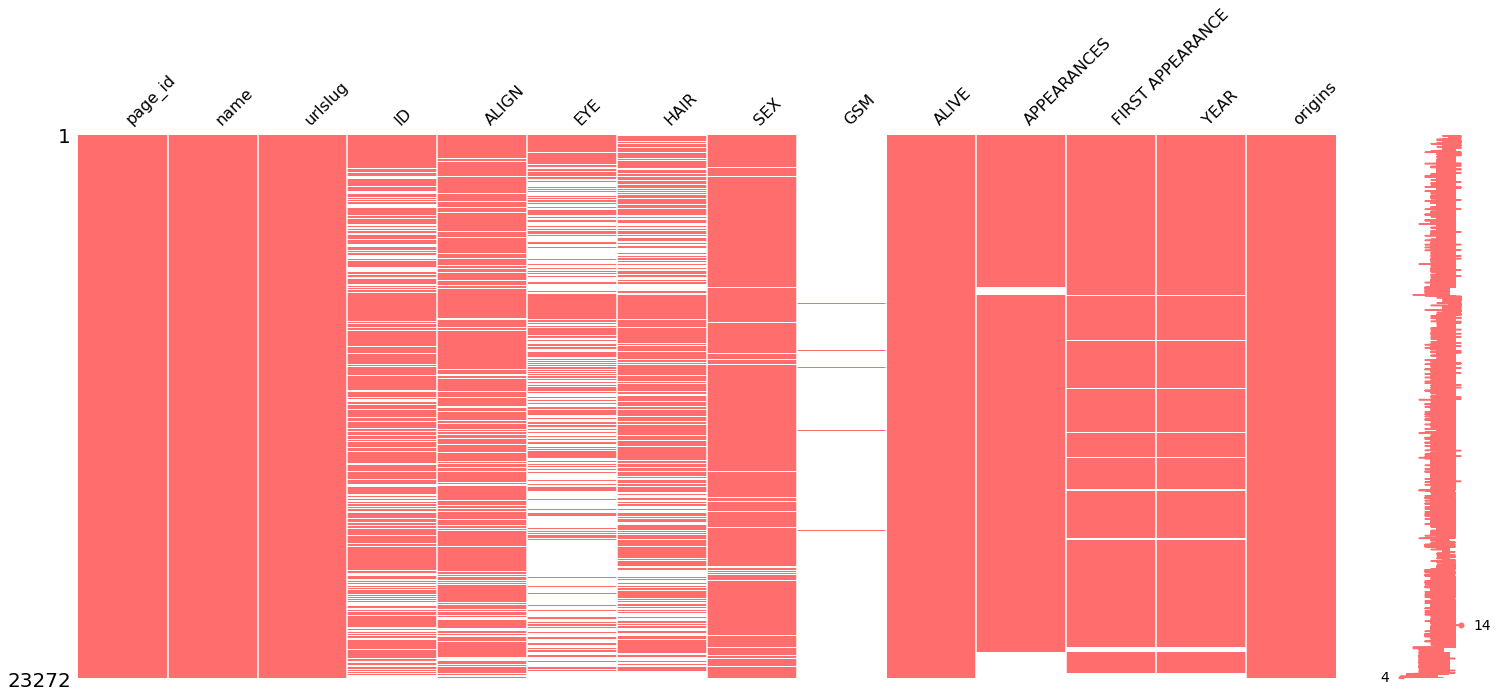

In [ ]:
# Visualisasi NAN values
import missingno as msno

fig = msno.matrix(superhero, color=(1, 0.43, 0.43))

# 4.&nbsp;*Data Preprocessing* 2

## Handling Nan Values

### Drop Columns

sekaligus dilakukan pada kolom2 lain yang tidak diperlukan

In [7]:
superhero = superhero.drop(['page_id', 'urlslug', 'GSM'], axis=1)
superhero.isna().sum()

name                    0
ID                   5783
ALIGN                3413
EYE                 13395
HAIR                 6538
SEX                   979
ALIVE                   6
APPEARANCES          1451
FIRST APPEARANCE      884
YEAR                  884
origins                 0
dtype: int64

### *Drop rows* berdasarkan *columns* dengan Nan Values

jika tidak memungkinkan di*impute* nilai baru

In [8]:
superhero = superhero[superhero.APPEARANCES.notna()]
superhero = superhero[superhero['FIRST APPEARANCE'].notna()]
superhero = superhero[superhero.YEAR.notna()]
superhero = superhero[superhero.ALIVE.notna()]
superhero = superhero.reset_index(drop=True)
superhero.isna().sum()

name                    0
ID                   5152
ALIGN                3017
EYE                 12124
HAIR                 5657
SEX                   824
ALIVE                   0
APPEARANCES             0
FIRST APPEARANCE        0
YEAR                    0
origins                 0
dtype: int64

### *Impute* dengan kategori 'others'

In [9]:
superhero = superhero.fillna(value='others')
superhero.isna().sum()

name                0
ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
YEAR                0
origins             0
dtype: int64

## Buat fitur *MONTH*
bulan pertama kali kemunculan tokoh

In [10]:
superhero.loc[:, 'MONTH'] = superhero.loc[:, 'FIRST APPEARANCE'].apply(
    lambda x: (x.split('-')[0]).split(' ')[0]\
    if len((x.split('-')[0]).split(' ')[0]) <= 4 else\
    (x.split('-')[0]).split(' ')[1]
    )

## Perbaiki format fitur *MONTH*

In [11]:
superhero.loc[:, 'MONTH'] = superhero.MONTH.replace({
    'Aug': 'August',
    'Dec': 'December',
    'Oct': 'October',
    'Nov': 'November',
    'Sep': 'September',
    'Mar': 'March',
    'Jan': 'January',
    'Jun': 'June',
    'Jul': 'July',
    'Feb': 'February',
    'Apr': 'April'
})

superhero.MONTH.value_counts()

August       1937
December     1930
October      1908
September    1845
June         1806
March        1744
November     1743
January      1741
July         1719
May          1591
February     1549
April        1493
1993           28
1987           14
1988           13
1986           11
1989           11
1992           10
1995            9
1991            8
1999            8
1997            5
1990            5
1996            3
1984            3
Holiday         2
1998            2
1981            1
2000            1
1985            1
1982            1
1940            1
1983            1
Name: MONTH, dtype: int64

## Hapus value pada fitur *MONTH* jika freq < 1000

In [12]:
v = superhero.loc[:, ['MONTH']]
superhero = superhero[v.replace(v.apply(pd.Series.value_counts)).gt(1000).all(1)]
superhero = superhero.reset_index(drop=True)
superhero.MONTH.value_counts()

August       1937
December     1930
October      1908
September    1845
June         1806
March        1744
November     1743
January      1741
July         1719
May          1591
February     1549
April        1493
Name: MONTH, dtype: int64

## Ganti penamaan kategori pada fitur lain

In [13]:
# ID
superhero.loc[:, 'ID'] = superhero.ID.replace({
    'others': 'Identity Unknown',
    'Known to Authorities Identity': 'Secret Identity'
    })

# ALIGN
superhero.loc[:, 'ALIGN'] = superhero.ALIGN.replace({
    'Reformed Criminals': 'others'})

# SEX
sx = superhero.SEX.value_counts().to_dict()
superhero.loc[:, 'SEX'] = superhero.SEX.apply(lambda x : x  if sx[x] > 50 else 'others' )

# EYE
yy = superhero.EYE.value_counts().to_dict()
superhero.loc[:, 'EYE'] = superhero.EYE.apply(lambda x : x  if yy[x] > 100 else 'rare' )

# HAIR
superhero.loc[:, 'HAIR'] = superhero.HAIR.replace({
    'Bald': 'No Hair'
    })
hr = superhero.HAIR.value_counts().to_dict()
superhero.loc[:, 'HAIR'] = superhero.HAIR.apply(lambda x : x  if hr[x] > 100 else 'rare' )

# 5.&nbsp;Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

def pie_chart(df, title:str, values:str, names:list, hole:float, colors:str, labels:dict):
  """helper function to create pie chart
  * df: the dataframe contain data
  * title: the title for the chart
  * values: values to be visualize
  * names: the category names
  * hole: if prefer to have a doughnut model
  * colors: custom color for every category
  * labels: adjust the hover of the pie info
  """
  fig = px.pie(
      data_frame=df,
      title=title,
      values=values,
      names=names,
      hole=hole,
      color_discrete_sequence=colors,
      labels=labels)

  fig.show()

def plot_dist(df, column:str, title:str, cat_type:str='default', color:str='origins'):
  '''use to plot distribution interactively but very high computation'''
  if cat_type=='default':
    colors=['#ffff00', '#fcd37f', '#ffaa00', '#e60000', '#730000']
  else:
    colors=['#9FD8DF', '#FF7171']
  fig = px.histogram(
      data_frame=df,
      title=title,
      x=column,
      color=color,
      template='plotly_white',
      marginal='box',
      nbins=200,
      barmode='relative',
      histfunc='count')

  fig.show()

## Distribusi data Categorical

In [ ]:
superhero.columns

Index(['name', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES',
       'FIRST APPEARANCE', 'YEAR', 'origins', 'MONTH'],
      dtype='object')

In [ ]:
col_cat = superhero.drop(['name', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'], axis=1).columns

for col in col_cat:
  col_df = pd.DataFrame(superhero.loc[:, col].value_counts())

  pie_chart(col_df, 
            f'Distribusi kelas pada kolom {col}', 
            col, 
            col_df.index, 
            .5, 
            None,
            {'index':col, col:'Jumlah Data'})

In [ ]:
superhero.loc[:, 'YEAR'].value_counts()

1993.0    698
1994.0    661
2006.0    643
1992.0    593
2010.0    582
         ... 
1958.0     17
1938.0     10
1936.0      8
1937.0      4
1935.0      1
Name: YEAR, Length: 79, dtype: int64

## Distribusi data Continuous

In [ ]:
plot_dist(superhero, 'APPEARANCES', 'Distribusi data fitur APPEARANCES')

## *Relationships*

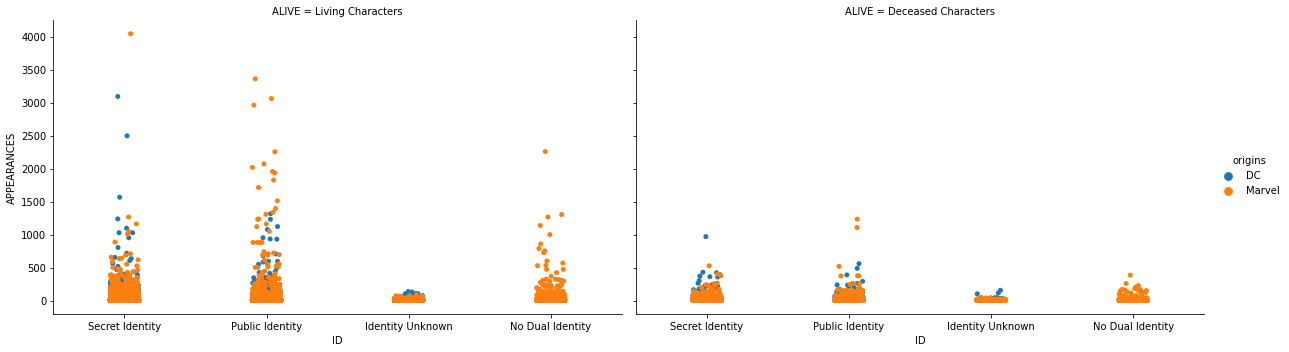

In [ ]:
sns.catplot(x='ID', y='APPEARANCES', hue='origins', aspect=1.7,
            col='ALIVE', kind='strip', data=superhero);

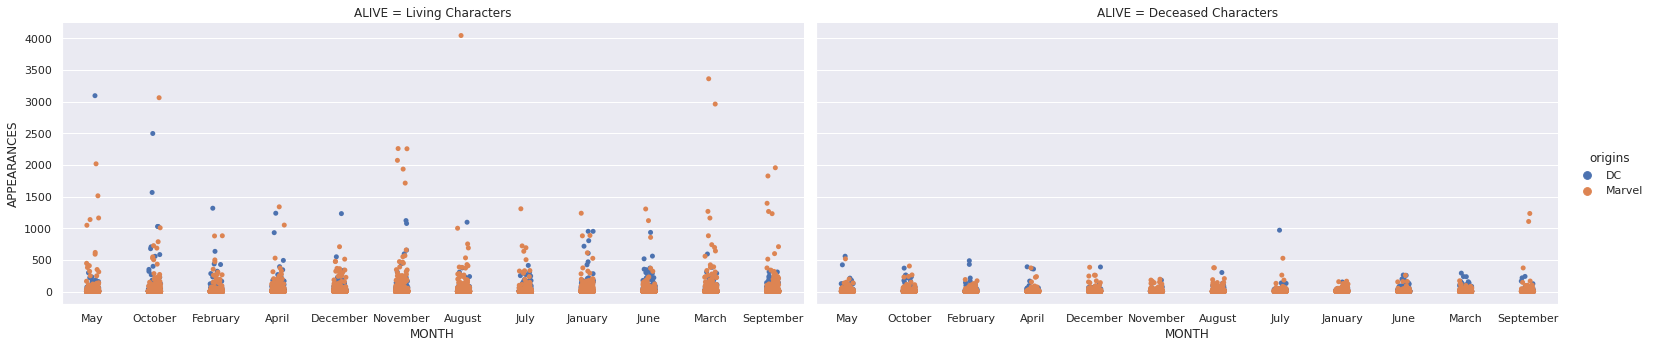

In [ ]:
sns.catplot(x='MONTH', y='APPEARANCES', hue='origins', aspect=2.2,
            col='ALIVE', kind='strip', data=superhero);

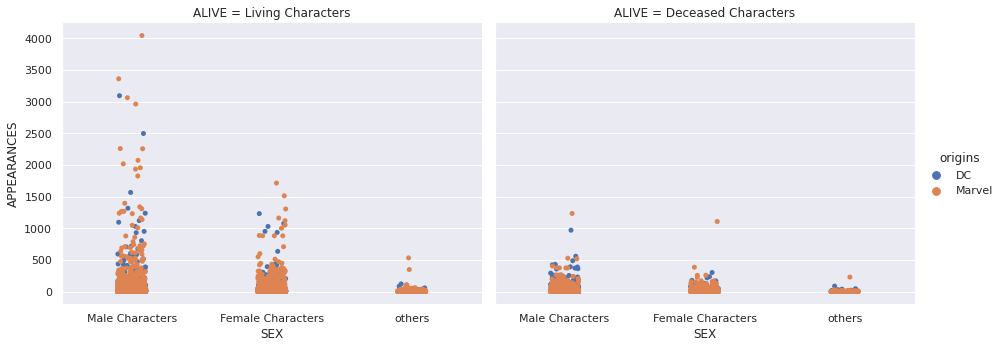

In [ ]:
sns.catplot(x='SEX', y='APPEARANCES', hue='origins', aspect=1.3,
            col='ALIVE', kind='strip', data=superhero);

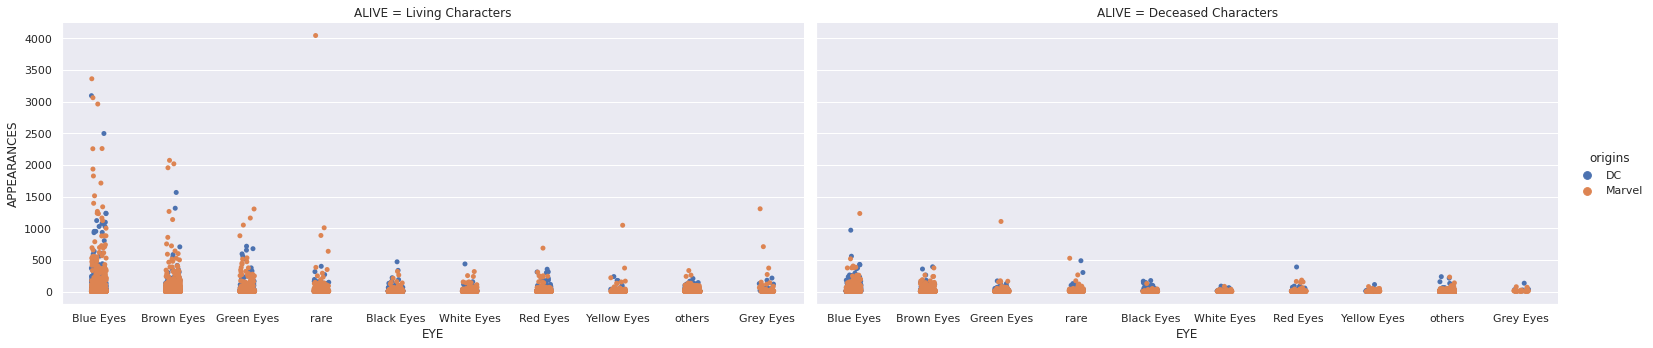

In [ ]:
sns.catplot(x='EYE', y='APPEARANCES', hue='origins', aspect=2.2,
            col='ALIVE', kind='strip', data=superhero);

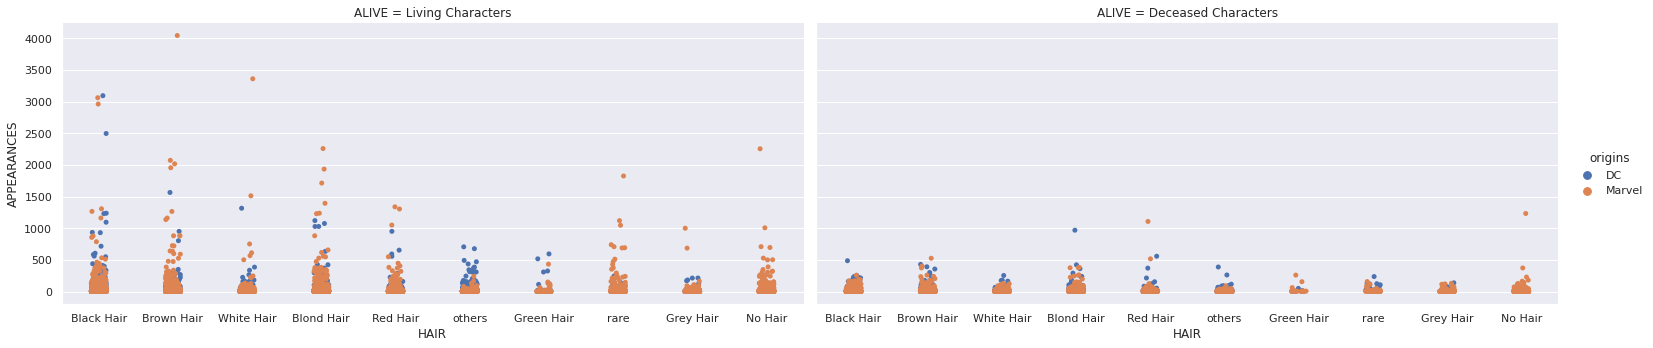

In [ ]:
sns.catplot(x='HAIR', y='APPEARANCES', hue='origins', aspect=2.2,
            col='ALIVE', kind='strip', data=superhero);

# 6.&nbsp;Data Wrangling

## *Discretize* `APPEARANCES`

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

def discrete_appear(col):
  if col > 1000:
    return '>1000'
  elif col > 500:
    return '>500'
  elif col > 400:
    return '>400'
  elif col > 300:
    return '>300'
  elif col > 200:
    return '>200'
  elif col > 100:
    return '>100'
  elif col > 60:
    return '>60'
  elif col > 30:
    return '>30'
  return str(int(col))

# kbind = KBinsDiscretizer(strategy='uniform', encode='ordinal', n_bins=10)
# superhero.loc[:, 'APPEAR_BIN'] = kbind.fit_transform(superhero.loc[:, ['APPEARANCES']])[:, 0]
superhero.loc[:, 'APPEAR_CAT'] = superhero.APPEARANCES.apply(discrete_appear)

superhero.loc[:, ['APPEAR_CAT']].value_counts()

APPEAR_CAT
1             5530
2             2646
3             1824
4             1519
5             1134
>30           1007
6              929
7              703
8              576
9              479
>60            422
10             410
>100           368
11             339
12             305
13             281
14             268
16             210
15             209
17             181
19             167
18             162
20             138
>200           129
21             120
23             102
22              99
24              95
25              90
26              83
28              80
29              73
>300            70
27              68
30              65
>500            59
>1000           41
>400            25
dtype: int64

## *Discretize* `YEAR`

In [16]:
def discrete_year(col):
  if col < 1970:
    return '<1970'
  elif col < 1980:
    return '<1980'
  elif col < 1985:
    return '<1985'
  elif col < 1990:
    return '<1990'
  elif col < 1995:
    return '<1995'  
  elif col < 2000:
    return '<2000'
  elif col < 2005:
    return '<2005'
  return '>=2005'

# kbind = KBinsDiscretizer(strategy='uniform', encode='ordinal')
# superhero.loc[:, 'YEAR_BIN'] = kbind.fit_transform(superhero.loc[:, ['APPEARANCES']])[:, 0]
superhero.loc[:, 'YEAR_CAT'] = superhero.YEAR.apply(discrete_year)

superhero.loc[:, ['YEAR_CAT']].value_counts()

YEAR_CAT
>=2005      4008
<1970       3865
<1995       2917
<1980       2515
<1990       2185
<2000       2095
<2005       1861
<1985       1560
dtype: int64

## One-Hot Fitur

In [17]:
superhero2 = superhero.copy()

In [18]:
superhero = superhero.set_index('name').sample(frac=1.0, random_state=233)
superhero = superhero.drop(['APPEARANCES', 'YEAR', 'FIRST APPEARANCE'], axis=1)

superhero_names = superhero.index
superhero_names = pd.DataFrame({'name':superhero_names})

superhero

,ID,ALIGN,EYE,HAIR,SEX,ALIVE,origins,MONTH,APPEAR_CAT,YEAR_CAT
name,,,,,,,,,,
Sir Lancelot (Earth-616),Public Identity,Good Characters,others,Black Hair,Male Characters,Living Characters,Marvel,May,5,<1970
Tani Uiruson (Earth-616),Identity Unknown,Bad Characters,others,others,Male Characters,Living Characters,Marvel,August,2,<1985
Remora (Atlantean) (Earth-616),Identity Unknown,Good Characters,others,others,Male Characters,Living Characters,Marvel,January,2,<1995
Paul Hoben (New Earth),Public Identity,Good Characters,others,Brown Hair,Male Characters,Living Characters,DC,September,15,<1985
Radiant (New Earth),Identity Unknown,Good Characters,others,others,others,Deceased Characters,DC,May,4,<1995
...,...,...,...,...,...,...,...,...,...,...
Brain (Business Man) (Earth-616),Secret Identity,Bad Characters,others,No Hair,Male Characters,Deceased Characters,Marvel,November,1,<1970
Junzo Muto (Earth-616),Public Identity,Bad Characters,others,Black Hair,Male Characters,Living Characters,Marvel,February,7,<2005
Baron Zebek (Earth-616),No Dual Identity,Bad Characters,others,others,Male Characters,Living Characters,Marvel,May,2,<2000


In [40]:
super_hot = pd.get_dummies(superhero)
super_hot

,ID_Identity Unknown,ID_No Dual Identity,ID_Public Identity,ID_Secret Identity,ALIGN_Bad Characters,ALIGN_Good Characters,ALIGN_Neutral Characters,ALIGN_others,EYE_Black Eyes,EYE_Blue Eyes,EYE_Brown Eyes,EYE_Green Eyes,EYE_Grey Eyes,EYE_Red Eyes,EYE_White Eyes,EYE_Yellow Eyes,EYE_others,EYE_rare,HAIR_Black Hair,HAIR_Blond Hair,HAIR_Brown Hair,HAIR_Green Hair,HAIR_Grey Hair,HAIR_No Hair,HAIR_Red Hair,HAIR_White Hair,HAIR_others,HAIR_rare,SEX_Female Characters,SEX_Male Characters,SEX_others,ALIVE_Deceased Characters,ALIVE_Living Characters,origins_DC,origins_Marvel,MONTH_April,MONTH_August,MONTH_December,MONTH_February,MONTH_January,...,APPEAR_CAT_15,APPEAR_CAT_16,APPEAR_CAT_17,APPEAR_CAT_18,APPEAR_CAT_19,APPEAR_CAT_2,APPEAR_CAT_20,APPEAR_CAT_21,APPEAR_CAT_22,APPEAR_CAT_23,APPEAR_CAT_24,APPEAR_CAT_25,APPEAR_CAT_26,APPEAR_CAT_27,APPEAR_CAT_28,APPEAR_CAT_29,APPEAR_CAT_3,APPEAR_CAT_30,APPEAR_CAT_4,APPEAR_CAT_5,APPEAR_CAT_6,APPEAR_CAT_7,APPEAR_CAT_8,APPEAR_CAT_9,APPEAR_CAT_>100,APPEAR_CAT_>1000,APPEAR_CAT_>200,APPEAR_CAT_>30,APPEAR_CAT_>300,APPEAR_CAT_>400,APPEAR_CAT_>500,APPEAR_CAT_>60,YEAR_CAT_<1970,YEAR_CAT_<1980,YEAR_CAT_<1985,YEAR_CAT_<1990,YEAR_CAT_<1995,YEAR_CAT_<2000,YEAR_CAT_<2005,YEAR_CAT_>=2005
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sir Lancelot (Earth-616),0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Tani Uiruson (Earth-616),1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Remora (Atlantean) (Earth-616),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Paul Hoben (New Earth),0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Radiant (New Earth),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brain (Business Man) (Earth-616),0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Junzo Muto (Earth-616),0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Baron Zebek (Earth-616),0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# 7.&nbsp;Recommendation Systems

<small>note: nama superhero harus `sama persis` dengan yang terdapat di dataset</small>

In [28]:
super_hot[super_hot.index.str.contains('Captain America')]

In [109]:
from sklearn.neighbors import NearestNeighbors

def get_recommended_heroes(model, df, name_df, hero_name:str, kind:str='jaccard', num_recommend:int=5):
  '''
  Fungsi mendapatkan rekomendasi superheroes figures 
  berdasarkan dua hitungan jarak, 'dice' atau 'cosine'
  '''
  print(f'Apabila anda menyukai action figure \'{hero_name}\'')
  print('5 action figure berikut ini juga mungkin anda sukai:')

  # handle nama hero itu sendiri (yang sedang diberikan rekomendasi)
  num_recommend = num_recommend+1

  if kind == 'jaccard':
    distances, neighbors = model.kneighbors(df.loc[[hero_name]], n_neighbors=num_recommend)
    similar_heroes = []
    for name_hero in name_df.loc[neighbors[0][:]].values:
      similar_heroes.append(name_hero[0])

    similar_distances = []
    for distance in distances[0]:
      similar_distances.append(f'{round(100-distance, 3)}%')

  elif kind == 'cosine':
    cos_df = df.loc[:, [hero_name]].sort_values(by=hero_name, ascending=False)
    cos_df = cos_df.head(num_recommend)

    similar_heroes = cos_df.index.tolist()
    similar_distances = cos_df.loc[:, hero_name].apply(
        lambda x: f'{round(x*100, 3)}%'
    ).values.tolist()

  else:
    similar_heroes, similar_distances = [0], [0]

  # hasil rekomendasi
  results_df = pd.DataFrame(data={
      'Superheroes' : similar_heroes, 
      'Tingkat Kesamaan' : similar_distances
      }).set_index('Superheroes')
  
  results_df.loc[:, 'temp_score'] = results_df.loc[:, 'Tingkat Kesamaan'].apply(
      lambda x: float(x.split('%')[0])
  )

  # menghilangkan nama tokoh yang sedang coba direkomendasikan
  results_df = results_df.drop([hero_name])

  # urutkan N kemiripan tertinggi
  results_df = results_df.sort_values(by='temp_score', ascending=False)
  results_df = results_df.drop(['temp_score'], axis=1)

  return results_df

## Nearest Neighbors (NN) - Jaccard

In [110]:
nnjc = NearestNeighbors(metric='jaccard')

nnjc.fit(super_hot)

NearestNeighbors(metric='jaccard')

In [111]:
nnjac_recom_aquaman = get_recommended_heroes(nnjc, super_hot, superhero_names, 'Aquaman (Arthur Curry)')
nnjac_recom_aquaman

Apabila anda menyukai action figure 'Aquaman (Arthur Curry)'
5 action figure berikut ini juga mungkin anda sukai:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,Tingkat Kesamaan
Superheroes,
Dinah Laurel Lance (New Earth),99.818%
Jonathan Storm (Earth-616),99.818%
Warren Worthington III (Earth-616),99.667%
Steven Trevor (New Earth),99.667%
Bulldozer Nichols (New Earth),99.667%


In [112]:
nnjac_recom_captain = get_recommended_heroes(nnjc, super_hot, superhero_names, 'Captain America (Steven Rogers)')
nnjac_recom_captain

Apabila anda menyukai action figure 'Captain America (Steven Rogers)'
5 action figure berikut ini juga mungkin anda sukai:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,Tingkat Kesamaan
Superheroes,
"Iron Man (Anthony \""Tony\"" Stark)",99.818%
Lieutenant General Fredricks (Earth-616),99.667%
Clay Harder (Earth-616),99.667%
Alexander Summers (Earth-616),99.667%
Norrin Radd (Earth-616),99.667%


## Cosine Similarity

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(super_hot)
cos_sim_df = pd.DataFrame(cos_sim, 
                          index=superhero_names['name'], 
                          columns=superhero_names['name'])
cos_sim_df

name,Sir Lancelot (Earth-616),Tani Uiruson (Earth-616),Remora (Atlantean) (Earth-616),Paul Hoben (New Earth),Radiant (New Earth),Dolores Downing (Earth-616),Achilles (New Earth),Peter Cannon (New Earth),D.C.1. (A.I.M.) (Earth-616),Claudio Volpe (New Earth),Sari Tartar (Earth-616),Samuel Benjamin (New Earth),Michael Duffy (Earth-616),Benjamin Addison (New Earth),Scandium (Element) (Earth-616),Roadkill (Earth-616),William Hastings (Earth-616),Eileen Flowers (New Earth),Requiem (Earth-616),Amsel Reiniger (New Earth),Christian Poulsen (Earth-616),Mark Armstrong (New Earth),Lubyev (Earth-616),Romnar (Earth-616),A.J. (New Earth),Mark Sheppard (Earth-616),X (Thanosi) (Earth-616),Germaine Caruso (Earth-616),Farley Stillwell (Earth-616),Sally (Barmaid) (Earth-616),Robert Bruce Banner Jr. (Counter-Earth) (Earth-616),Pyotr Vasilievich Starkovsky (Earth-616),Lucifer (Quist) (Earth-616),Stearn (New Earth),Carson Bells (Earth-616),Lemar Hoskins (Earth-616),Piotr Phobos (Earth-616),Cynas (Earth-616),Sarah Mumford (Earth-616),Gareth Thomas (Earth-616),...,Janos Quested (Earth-616),Elaine Kendrick (Earth-616),Little Barda (New Earth),Patch (Wildkat Klub) (Earth-616),Phoebe Marrs (Earth-616),Alpha (Mad Thinker Robot) (Earth-616),Abbas al-Abbad (Earth-616),Arthur Blackwood (Earth-616),Richard Drakunovski (New Earth),Dominic Mndawe (New Earth),Appa Ali Apsa (New Earth),Strangler (Earth-616),Walter Haley (New Earth),Twist Staley (Earth-616),Jacob Freeman (New Earth),Andrew Franklin (New Earth),Eric Hertz (Earth-616),J.A.K.E. I (New Earth),Falcona (Earth-616),Mildred Manor (Earth-616),Nick Iona (Earth-616),Carmella (Earth-616),Squagga (New Earth),Gigantus (New Earth),Singer (Earth-616),Gullywhump (Earth-616),Tisiphone (New Earth),Gale (Institute) (Earth-616),Winston Kranpuff (Earth-616),Promise (New Earth),Lisa Jennings (New Earth),Deb Kafka (New Earth),Frederick Hudson (Earth-616),Sigmund Adler (Earth-616),Sebastian Shaw (Earth-616),Brain (Business Man) (Earth-616),Junzo Muto (Earth-616),Baron Zebek (Earth-616),Vincenzo Baldi (New Earth),Rachel Carpenter (Earth-616)
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sir Lancelot (Earth-616),1.0,0.4,0.5,0.5,0.3,0.2,0.5,0.3,0.3,0.3,0.6,0.3,0.6,0.3,0.2,0.3,0.5,0.4,0.3,0.3,0.4,0.3,0.3,0.7,0.3,0.4,0.3,0.5,0.5,0.4,0.4,0.4,0.4,0.5,0.8,0.5,0.5,0.4,0.4,0.5,...,0.3,0.4,0.3,0.4,0.4,0.4,0.5,0.3,0.5,0.3,0.1,0.5,0.5,0.4,0.4,0.4,0.5,0.2,0.5,0.4,0.6,0.2,0.3,0.5,0.3,0.4,0.2,0.4,0.2,0.1,0.3,0.4,0.3,0.8,0.4,0.4,0.6,0.5,0.3,0.4
Tani Uiruson (Earth-616),0.4,1.0,0.7,0.4,0.3,0.4,0.2,0.2,0.5,0.4,0.4,0.5,0.3,0.7,0.4,0.4,0.3,0.2,0.3,0.3,0.5,0.3,0.4,0.6,0.4,0.2,0.7,0.2,0.3,0.3,0.4,0.2,0.3,0.2,0.4,0.3,0.6,0.3,0.5,0.4,...,0.4,0.4,0.1,0.4,0.2,0.5,0.7,0.5,0.2,0.1,0.1,0.6,0.2,0.5,0.1,0.4,0.5,0.3,0.2,0.5,0.4,0.5,0.4,0.4,0.4,0.4,0.6,0.4,0.2,0.1,0.2,0.2,0.6,0.4,0.4,0.4,0.5,0.7,0.3,0.2
Remora (Atlantean) (Earth-616),0.5,0.7,1.0,0.4,0.5,0.4,0.3,0.4,0.5,0.2,0.3,0.3,0.4,0.6,0.3,0.5,0.5,0.3,0.2,0.2,0.4,0.5,0.3,0.5,0.4,0.3,0.5,0.3,0.4,0.3,0.4,0.3,0.3,0.4,0.6,0.4,0.4,0.3,0.6,0.5,...,0.3,0.5,0.2,0.3,0.4,0.3,0.6,0.3,0.3,0.2,0.1,0.6,0.3,0.5,0.2,0.5,0.4,0.3,0.2,0.5,0.4,0.5,0.6,0.6,0.5,0.5,0.4,0.4,0.2,0.1,0.3,0.2,0.6,0.5,0.4,0.3,0.4,0.6,0.3,0.4
Paul Hoben (New Earth),0.5,0.4,0.4,1.0,0.3,0.1,0.6,0.5,0.2,0.4,0.3,0.5,0.5,0.4,0.2,0.2,0.3,0.6,0.1,0.3,0.2,0.5,0.2,0.4,0.4,0.2,0.2,0.3,0.4,0.2,0.4,0.4,0.1,0.5,0.5,0.3,0.5,0.3,0.3,0.3,...,0.2,0.4,0.6,0.3,0.3,0.3,0.3,0.4,0.5,0.3,0.2,0.3,0.6,0.2,0.4,0.5,0.2,0.4,0.3,0.2,0.4,0.1,0.4,0.6,0.2,0.3,0.4,0.2,0.1,0.2,0.5,0.5,0.2,0.5,0.3,0.2,0.4,0.3,0.3,0.3
Radiant (New Earth),0.3,0.3,0.5,0.3,1.0,0.4,0.4,0.3,0.0,0.2,0.2,0.2,0.3,0.4,0.2,0.4,0.2,0.3,0.1,0.2,0.3,0.4,0.1,0.1,0.3,0.2,0.4,0.2,0.3,0.0,0.1,0.2,0.1,0.4,0.2,0.1,0.2,0.1,0.4,0.3,...,0.0,0.3,0.2,0.1,0.2,0.1,0.4,0.0,0.3,0.3,0.2,0.3,0.2,0.3,0.5,0.4,0.3,0.4,0.0,0.4,0.1,0.2,0.7,0.5,0.2,0.4,0.4,0.2,0.1,0.2,0.3,0.2,0.4,0.3,0.0,0.2,0.1,0.3,0.5,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [114]:
cos_recom_aquaman = get_recommended_heroes(None, cos_sim_df, superhero_names, 'Aquaman (Arthur Curry)', kind='cosine')
cos_recom_aquaman

Apabila anda menyukai action figure 'Aquaman (Arthur Curry)'
5 action figure berikut ini juga mungkin anda sukai:


,Tingkat Kesamaan
Superheroes,
Dinah Laurel Lance (New Earth),90.0%
Jonathan Storm (Earth-616),90.0%
Bulldozer Nichols (New Earth),80.0%
Clinton Barton (Earth-616),80.0%
Phillip Mason (New Earth),80.0%


In [115]:
cos_recom_captain = get_recommended_heroes(None, cos_sim_df, superhero_names, 'Captain America (Steven Rogers)', kind='cosine')
cos_recom_captain

Apabila anda menyukai action figure 'Captain America (Steven Rogers)'
5 action figure berikut ini juga mungkin anda sukai:


,Tingkat Kesamaan
Superheroes,
"Iron Man (Anthony \""Tony\"" Stark)",90.0%
Benjamin Grimm (Earth-616),80.0%
Scoops Winston (Earth-616),80.0%
Cactus (American Frontier) (Earth-616),80.0%
Clinton Barton (Earth-616),80.0%


# 8.&nbsp;*Evaluation*

menerapkan pendekatan kebalikan dari setiap metrik (untuk menandakan hasil rekomendasi tidak terpisah jauh atau terpisah dengan jelas dan tentu hal ini semakin baik)

In [183]:
import statistics as statcs
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def eval_recom(df, recommended_heroes:list, hero_truth:str):
  '''
  Mendapatkan kelompok cluster hasil dari rekomendasi
  '''
  def eval_calc(X, labels):
    # -1 (sangat buruk(salah cluster)) s.d. 1 (terbaik (cluster sangat terpisah)). dekat 0 ada tumpang tindih
    silh = silhouette_score(X, labels)

    # semakin besar cluster semakin terpisah
    cal_har = calinski_harabasz_score(X, labels)

     # mendekati 0, maka cluster makin terpisah
    dav_bou = davies_bouldin_score(X, labels)

    # metrics_df = pd.DataFrame({
    #     'Silhouette': [silh],
    #     'Calinski & Harabasz': [cal_har],
    #     'Davies-Bouldin': [dav_bou]
    # }).T

    # metrics_df.columns = ['score']

    # return metrics_df
    return silh, cal_har, dav_bou

  # pelabelan cluster (dengan perputaran label)
  # hero_truth = ['Aquaman (Arthur Curry)', 'Captain America (Steven Rogers)']
  hero_truth = [hero_truth]
  hero_clus = hero_truth +  recommended_heroes
  # hero_clus = [hero_clus[0]] + hero_clus[2:7] + [hero_clus[1]] + hero_clus[7:]

  hero_clus_temp = hero_clus.copy()
  hero_clus2 = hero_truth * 6
  hero_clus2_temp = hero_clus2.copy()

  # ambil informasi superhero asli (fitur2 dari df superhot)
  filtered_recom = df.filter(items = hero_clus, axis=0)

  # label_clus = [hero_truth[0]] * 6 + [hero_truth[1]] * 6

  # label_clus =  hero_truth * 2 + hero_clus[2:] 
  # label_clus =  hero_truth + hero_clus[1] + hero_truth + hero_clus[3:]
  # label_clus =  hero_truth + hero_clus[1] + hero_clus[2] + hero_truth + hero_clus[4:]
  # label_clus =  hero_truth + hero_clus[1] + hero_clus[2] + hero_clus[3] + hero_truth + hero_clus[5]
  # label_clus =  hero_truth + hero_clus[1] + hero_clus[2] + hero_clus[3] +  hero_clus[4] + hero_truth 

  label_list = []
  silh_list, calhar_list, davbou_list = [], [], []

  # proses perputarannya
  for i in range(1, len(hero_clus)):
    hero_clus[i] = hero_clus_temp[0]
    hero_clus2[i] = hero_clus_temp[i]

    label_list.append(hero_clus)
    label_list.append(hero_clus2)

    hero_clus = hero_clus_temp.copy()
    hero_clus2 = hero_clus2_temp.copy()

  filtered_arr = filtered_recom.values

  # pengumpulan hasil perhitungan tiap metrik
  for lbl in label_list:
    label_arr = np.array(lbl)
    silh_list.append(eval_calc(filtered_arr, label_arr)[0])
    calhar_list.append(eval_calc(filtered_arr, label_arr)[1])
    davbou_list.append(eval_calc(filtered_arr, label_arr)[2])
  
  silh_mean = statcs.mean(silh_list)
  calhar_mean = statcs.mean(calhar_list)
  davbou_mean = statcs.mean(davbou_list)

  metrics_df = pd.DataFrame({
      'Silhouette': [silh_mean],
      'Calinski & Harabasz': [calhar_mean],
      'Davies-Bouldin': [davbou_mean]
      }).T

  metrics_df.columns = ['score']

  return metrics_df

## NN - Jaccard

In [174]:
aquaman_nnjac = nnjac_recom_aquaman.index.tolist()

eval_recom(super_hot, aquaman_nnjac, 'Aquaman (Arthur Curry)')

,score
Silhouette,0.000081
Calinski & Harabasz,1.448557
Davies-Bouldin,0.641715


In [175]:
captain_nnjac = nnjac_recom_captain.index.tolist()

eval_recom(super_hot, captain_nnjac, 'Captain America (Steven Rogers)')

,score
Silhouette,-0.017955
Calinski & Harabasz,1.203731
Davies-Bouldin,0.690078


## Cosine

In [177]:
aquaman_cos = cos_recom_aquaman.index.tolist()

eval_recom(super_hot, aquaman_cos, 'Aquaman (Arthur Curry)')

,score
Silhouette,0.000081
Calinski & Harabasz,1.448557
Davies-Bouldin,0.641715


In [176]:
captain_cos = cos_recom_captain.index.tolist()

eval_recom(super_hot, captain_cos, 'Captain America (Steven Rogers)')

,score
Silhouette,0.010948
Calinski & Harabasz,1.411004
Davies-Bouldin,0.640964


# Penutup

Hasil sistem rekomendasi telah menunjukkan keberhasilannya dengan baik dalam merekomendasikan superhero terhadap pengoleksi *action figures*. 